<a href="https://colab.research.google.com/github/marinavillaschi/portfolio_datascience_mpv/blob/main/Analisando_os_Dados_do_Airbnb_Munique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - *Munique*

*by [Marina Villaschi](https://www.linkedin.com/in/marinavillaschi)*


<center><img width="100%" src="https://img.freepik.com/fotos-gratis/munich-marienplatz_181624-9114.jpg"></center>


<a href="https://br.freepik.com/fotos/cidade">Cidade foto criado por wirestock - br.freepik.com</a>



O [Airbnb](https://www.airbnb.com.br/) é um serviço online que conecta pessoas que querem viajar com anfitriões que querem alugar suas propriedades.

Sem possuir nenhum hotel, já é considerado a **maior empresa hoteleira da atualidade**.

No final de 2018, com 10 anos de fundada, a Startup já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do site independente [inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


A proposta desse projeto é analisar os dados referentes à cidade de Munique, e obter o perfil das reservas feitas na cidade.

Para isto, iremos responder as seguintes perguntas:

* Qual a média dos preços de aluguel das propriedades em Munique?
* Qual o tipo de propriedade mais alugada no Airbnb em Munique?
* Qual a localidade mais cara para se hospedar em Munique?
* Qual é a média do mínimo de diárias para se hospedar em Munique?

Vamos lá!

## Obtenção dos Dados

Os dados aqui utilizados foram obtidos a partir do [inside Airbnb](http://insideairbnb.com/get-the-data.html), um site independente de análise de dados publicos do Airbnb.

O arquivo `listings.csv` - *Summary information and metrics for listings in Munich (good for visualisations)* foi baixado para esta análise exploratória inicial.



In [2]:
# importando os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importando o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/germany/bv/munich/2020-12-24/visualisations/listings.csv")


## Análise dos Dados

Afim de explicar como os dados estão estruturados, temos em seguida uma legenda das variáveis utilizadas.

**Lista de variáveis**

* `id`: número de identificação da propriedade
* `name`: título da propriedade
* `host_id`: número de identificação do anfitrião
* `host_name`: nome do anfitrião
* `neighbourhood_group`: tipo de bairro da propriedade (essa variável não apresenta valor válido)
* `neighbourhood`: nome do bairro da propriedade
* `latitude`: coordenada de latitude da propriedade
* `longitude`: coordenada de longitude da propriedade
* `room_type`: tipo de acomodação oferecida pelo anfitrião
* `price`: preço da diária da propriedade na moeda local
* `minimum_nights`: quantidade mínima de diárias estabelecida pelo anfitrião
* `number_of_reviews`: quantidade de comentários deixados por hóspedes após estadia na propriedade
* `last_review`: data do último comentário deixado por hóspede
* `reviews_per_month`: quantidade de comentários por mês
* `calculated_host_listings_count`: quantidade de propriedades do mesmo anfitrião
* `vailability_365`: disponibilidade da propriedade ao longo de um ano


Antes de dar início, iremos analisar as 5 primeiras entradas para verificar a aparência do *dataset*:

In [4]:
# mostrando as 5 primeiras entradas

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.11476,11.48782,Entire home/apt,80,2,130,2019-10-03,1.18,2,5
1,114695,Apartment Munich/East with sundeck,581737,Stephan,NaN,Berg am Laim,48.11923,11.63726,Entire home/apt,95,2,53,2019-10-06,0.46,2,52
2,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.15198,11.56486,Entire home/apt,99,2,93,2020-10-20,0.80,1,9
3,170815,Your own flat near central station!,814793,Inge,NaN,Neuhausen-Nymphenburg,48.16132,11.54154,Entire home/apt,65,3,64,2020-02-18,0.56,1,0
4,171749,1min to subway - Wettersteinplatz,819382,Tarek,NaN,Untergiesing-Harlaching,48.10583,11.57843,Private room,37,3,357,2020-12-04,3.12,1,85


### **Variáveis e entradas**

Iremos apresentar o número de atributos e de entradas o conjunto em análise possui, assim como identificar os tipos.

Vale ressaltar que o *dataset* utilizado (`listings.csv` - *Summary information and metrics for listings in Munich*) é uma versão "resumida" dos dados. No mesmo site existe também uma versão mais detalhada (`listings.csv.gz` - *Detailed Listings data for Munich*) com 4815 entradas e 74 variáveis.

In [ ]:
# identificando o volume de dados do DataFrame

print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificando as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 4815
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Valores ausentes no *dataset***

Prezando pela qualidade do *dataset* em análise, é importante entender no início se a quantidade de valores nulos são significativos comparados ao total de entradas.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.238214
last_review                       0.238214
host_name                         0.000208
name                              0.000208
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

A partir da relação obtida, é possível observar:

* A variável `neighbourhood_group` tem sua totalidade em valores nulos. 
* As variáveis `reviews_per_month` e `last_review` têm aproximadamente 25% em valores nulos.
* As variáveis `host_name` e `name` têm aproximadamente 0,2% em valores nulos.
* As demais variáveis não possuem valores nulos.

### **Distribuição das variáveis** 

Para identificar a distribuição das variáveis, será plotado o histograma.

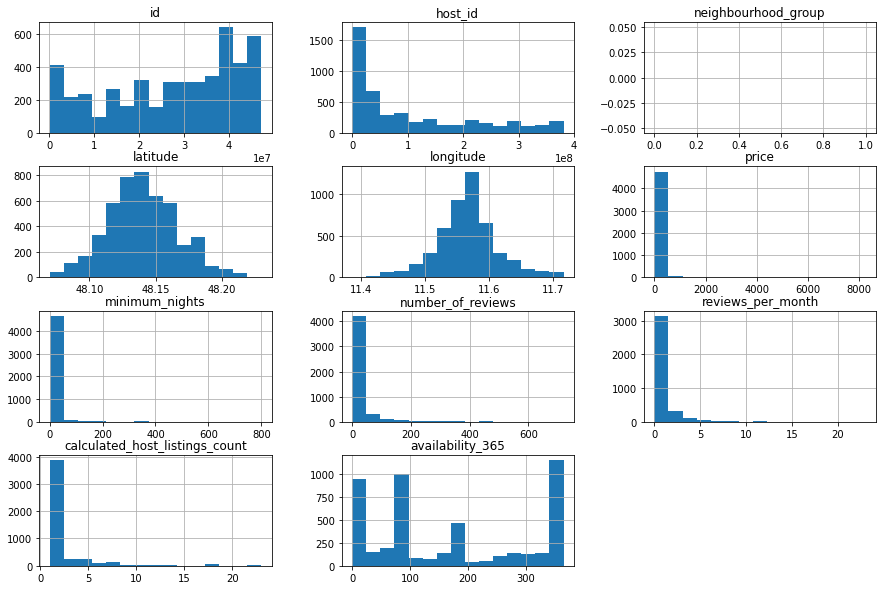

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Detecção de *outliers***

Pela distribuição do histograma plotado acima, é possível verificar indícios da presença de *outliers*.

Os valores das variáveis `price`, `minimum_nights` e não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para as variáveis

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4815.000000,4815.000000,4815.000000,3668.000000,4815.000000,4815.000000
mean,113.059398,7.581931,22.361994,0.819951,2.316719,170.044444
std,246.613897,27.814543,52.331332,1.321611,3.288635,136.200772
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,1.000000,0.150000,1.000000,59.000000
50%,75.000000,2.000000,4.000000,0.380000,1.000000,137.000000
75%,120.000000,3.000000,19.000000,0.930000,2.000000,331.000000
max,8255.000000,800.000000,720.000000,23.030000,23.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 120, porém seu valor máximo é 8255.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.



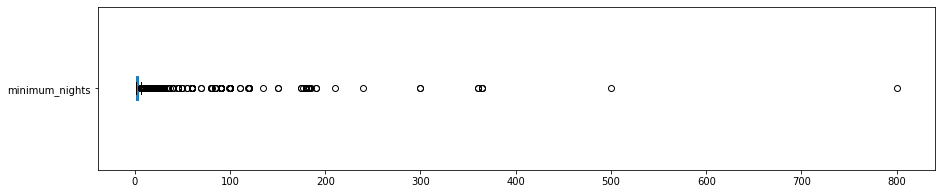

minimum_nights -> valores acima de 10:
494 entradas
10.2596%


In [ ]:
# boxplot para a variável minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 10 dias para minimum_nights
print("minimum_nights -> valores acima de 10:")
print("{} entradas".format(len(df[df.minimum_nights > 10])))
print("{:.4f}%".format((len(df[df.minimum_nights > 10]) / df.shape[0])*100))

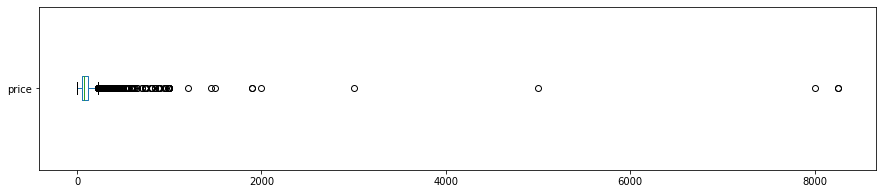


price: valores acima de 600
46 entradas
0.9553%


In [ ]:
# boxplot para a variável price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 600 para price
print("\nprice: valores acima de 600")
print("{} entradas".format(len(df[df.price > 600])))
print("{:.4f}%".format((len(df[df.price > 600]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));


Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

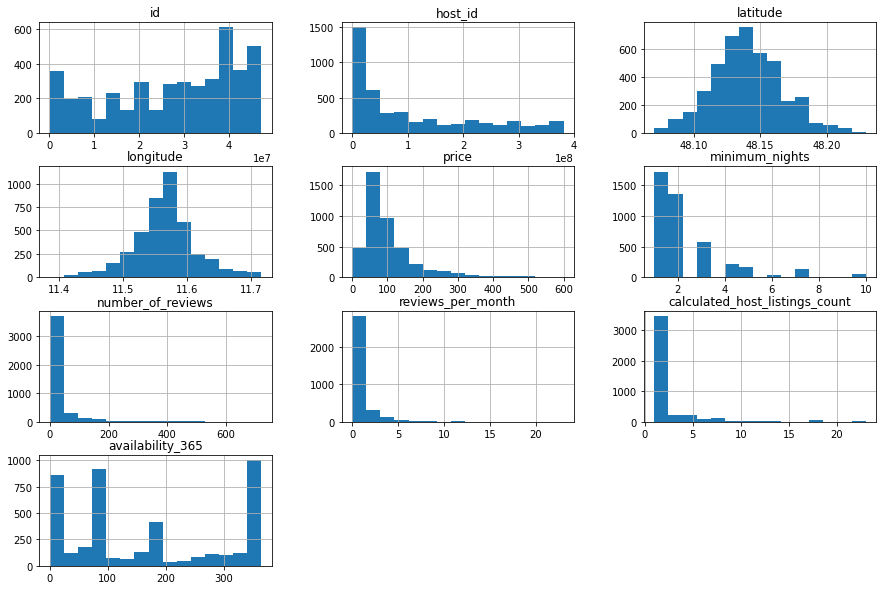

In [ ]:
# removendo os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 600].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 10].index, axis=0, inplace=True)

# removendo `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotando o histograma sem outliers
df_clean.hist(bins=15, figsize=(15,10));

### **Analise da correlação entre as variáveis**

Neste momento procuramos avaliar a intensidade das relações entre duas variáveis, e isso é feito através do coeficiente de correlação.

Para isto, iremos:
* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criando uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr ()

# mostrando a matriz de correlação

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.108760,-0.090141,-0.086923,0.008414,0.073723
minimum_nights,-0.108760,1.000000,-0.102427,-0.112866,0.132986,0.004140
number_of_reviews,-0.090141,-0.102427,1.000000,0.703995,0.019053,0.070989
reviews_per_month,-0.086923,-0.112866,0.703995,1.000000,0.127533,0.042970
calculated_host_listings_count,0.008414,0.132986,0.019053,0.127533,1.000000,0.092409
availability_365,0.073723,0.004140,0.070989,0.042970,0.092409,1.000000


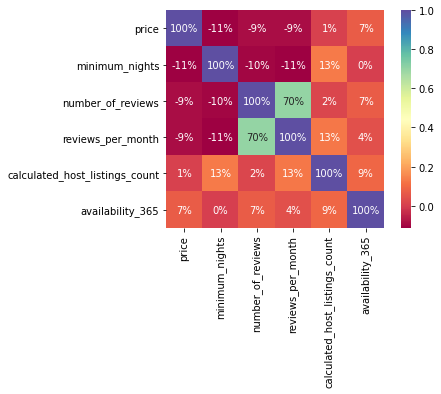

In [ ]:
# plotando um heatmap a partir das correlações

sns.heatmap(corr, cmap='Spectral', fmt='.0%', square=True, linecolor='white', annot=True)


Através do heatmap plotado, é possível observar algumas correlações entre as variáveis:

* as variáveis `number_of_reviews` e `reviews_per month` como era de se esperar, tem uma correlação positiva e de alto valor, já que quanto mais avaliações por mês, maior o número total de avaliações.

* a variável `price` tem uma correlação negativa com a variàvel `minimum_nights`, o que é curioso já que seria esperado uma correlação positiva.

## Respondendo às perguntas

Vamos então finalmente responder às perguntas propostas:

### **Q1. Qual a média dos preços de aluguel das pripriedades em Munique?**

A seguir é apresentado a média dos preços por diária na moeda local.

In [5]:
# ver a média da coluna `price`

print("O preço médio da diária na cidade de Munique é de €",round(df.price.mean(),2))



O preço médio da diária na cidade de Munique é de € 113.06


### **Q2. Qual o tipo de propriedade mais alugada no Airbnb em Munique?**

Existem alguns tipos de propriedades a serem alugadas pelo Airbnb como apartamentos/casas inteiras, somente um quarto de uma casa, um quarto dividido e até mesmo um quarto de hotel.

A variável `room_type` indica o tipo de propriedade que está anunciada no site. Vamos contar a quantidade de ocorrências de cada tipo de propriedade usando o método `value_counts()` afim de identificar o tipo mais alugado.

In [ ]:
# mostrando a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    2465
Private room       2050
Shared room          80
Hotel room           62
Name: room_type, dtype: int64

In [ ]:
# mostrando a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.529311
Private room       0.440198
Shared room        0.017178
Hotel room         0.013313
Name: room_type, dtype: float64

Praticamente metade das propriedades alugadas são do tipo apartamentos/casas inteiras e a outra metade é do tipo quartos particulares.

### **Q3. Qual a localidade mais cara para se hospedar em Munique?**

Faremos uma comparação das localidades (bairros) em função do preço usando `groupby()`.



In [ ]:
# ver média de preços por bairros

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Ludwigsvorstadt-Isarvorstadt    148.787645
Altstadt-Lehel                  146.521739
Schwanthalerhöhe                136.692308
Feldmoching-Hasenbergl          127.861538
Sendling                        118.685535
Au-Haidhausen                   108.505455
Maxvorstadt                     107.342105
Tudering-Riem                   104.181818
Sendling-Westpark               100.971264
Schwabing-West                   99.962500
Name: price, dtype: float64

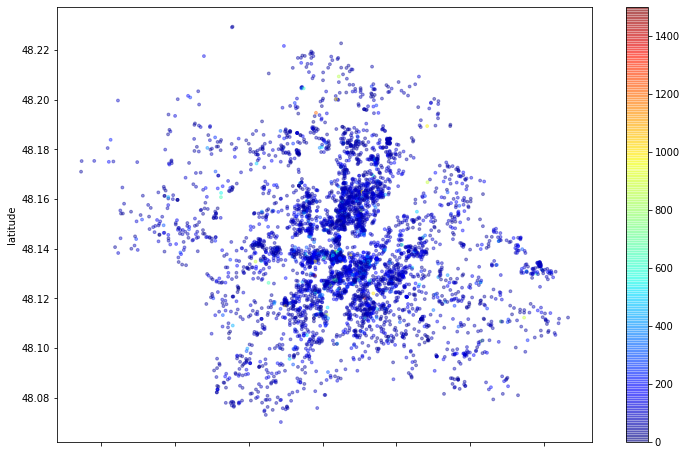

In [ ]:
# plotando os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))


### **Q4. Qual é a média do mínimo de diárias para se hospedar em Munique?**

O anfitrião tem a possibilidade de escolher a quantidade mínima de diárias é conveniente para ele receber os hóspedes.

Verificaremos a média do mínimo de diárias para se hospedar em Munique.


In [ ]:
# ver a média da coluna `minimum_nights``

print("A média da quantidade mínima de diárias para se hospedar em Munique é de", round(df.minimum_nights.mean()), "diárias.")

A média da quantidade mínima de diárias para se hospedar em Munique é de 8 diárias.


## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb para a cidade de Munique, porém já foi possível perceber a presença de *outliers* em algumas das variáveis. 

Para uma análise mais próxima da realidade, seria interessante a participação de algum nativo da cidade, ou alguém que conheça bem a cidade afim de auxiliar na percepção de outros *outliers* e dados estranhos e sua manipulação para um resultado mais verídico.

Por fim, vale lembrar que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados mais detalhados, com 74 atributos disponíveis.